In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
stats = pd.DataFrame(columns=["name","attempted_passes","big_chances_created","big_chances_missed","clearances_blocks_interceptions","completed_passes","dribbles","errors_leading_to_goal_attempt","fixture","fouls","key_passes","minutes","offside","open_play_crosses","opponent_team","penalties_conceded","penalties_missed","penalties_saved","recoveries","red_cards","round","saves","tackled","tackles","target_missed","team_score","was_home","yellow_cards","shots_on_target", "season"])
test = pd.DataFrame(columns=["name","attempted_passes","big_chances_created","big_chances_missed","clearances_blocks_interceptions","completed_passes","dribbles","errors_leading_to_goal_attempt","fixture","fouls","key_passes","minutes","offside","open_play_crosses","opponent_team","penalties_conceded","penalties_missed","penalties_saved","recoveries","red_cards","round","saves","tackled","tackles","target_missed","team_score","was_home","yellow_cards","shots_on_target", "season"])
seasonstart = [16, 17, 18]
for i in seasonstart:
    for j in range(38):
        statsgw = pd.read_csv("Parsed_20" + str(i) + "_" + str(i+1) + "/gwgames/gw" + str(j+1) + ".csv")
        statsgw["season"] = i
        if i == 18:
            test = test.append(statsgw, ignore_index=True)
        else:
            stats = stats.append(statsgw, ignore_index=True)
#stats = pd.read_csv("Parsed_2016_17/gwgames/gw1.csv")
stats = stats.drop(columns=["minutes", "opponent_team"])
test = test.drop(columns=["minutes", "opponent_team"])

In [4]:
#stats.describe()
#stats.tail(10)
allnames = pd.DataFrame({"name":stats["name"].append(test["name"]),
                          "teamid":0})
allnames["name"] = pd.Categorical(allnames["name"])
allnames["teamid"] = allnames.name.cat.codes
names = {}
for index, row in allnames.iterrows():
    if not row["name"] in names.keys():
        names[row["name"]] = row["teamid"]
stats["teamid"] = -1
for i in range(stats.shape[0]):
    stats['teamid'].loc[i] = int(names.get(stats["name"].loc[i]))
    
test["teamid"] = -1
for i in range(test.shape[0]):
    test["teamid"].loc[i] = int(names.get(test["name"].loc[i]))

#for index, row in test.iterrows():
#    row["teamid"] = names.get(row["name"])
stats = stats.drop(columns=["name"])
test = test.drop(columns=["name"])
#stats.head()
stats.head()

C:\Users\Rasmus\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


attempted_passes big_chances_created big_chances_missed  \
0              351                   0                  0   
1              357                   0                  1   
2              485                   0                  1   
3              303                   0                  0   
4              559                   0                  0   

  clearances_blocks_interceptions completed_passes dribbles  \
0                              49              262        3   
1                              61              261        8   
2                              36              385        8   
3                              51              194        8   
4                              19              481       16   

  errors_leading_to_goal_attempt fixture fouls key_passes  ... saves tackled  \
0                              0      10    16          4  ...     4      19   
1                              0       3    10          9  ...     3      16   
2                              0       8    13          6  ...     3      23   
3                              0       7    12          4  ...     6      13   
4                              0      10    16         11  ...     2      26   

  tackles target_missed team_score was_home yellow_cards shots_on_target  \
0      18             2          1        0            2               3   
1      16             4          1        1            0               6   
2       8             3          3        1            3               5   
3      15             4          1        0            2               1   
4      10             6          2        1            5               6   

  season teamid  
0     16     25  
1     16      7  
2     16      1  
3     16     23  
4     16      5  

[5 rows x 28 columns]

In [5]:
labels = stats["team_score"].astype(int)
features = stats.drop(columns=["team_score"]).astype(int)

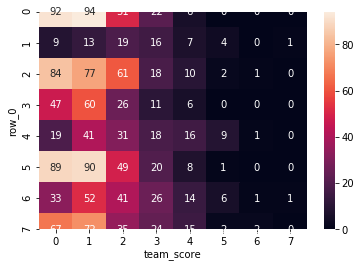

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, random_state=42).fit_predict(features)
cross = pd.crosstab(model,labels)
#cross = pd.crosstab(labels, labels)
sns.heatmap(cross,annot=True,annot_kws={"size":10})
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 35
KNNmodel = KNeighborsClassifier(n_neighbors=neighbors).fit(features, labels)

In [8]:
from sklearn.svm import SVC
SVCmodel = SVC(gamma="scale").fit(features, labels)

In [9]:
from sklearn.tree import DecisionTreeClassifier
DTCmodel = DecisionTreeClassifier(random_state=42).fit(features, labels)

In [10]:
from sklearn.ensemble import RandomForestClassifier
x = 10
RFCmodel = RandomForestClassifier(max_depth=x, random_state=42, n_estimators=10).fit(features, labels)

In [11]:
from sklearn.neural_network import MLPClassifier
MLPmodel = MLPClassifier(hidden_layer_sizes=30).fit(features, labels)

C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
KNNpredicted = KNNmodel.predict(test.drop(columns="team_score"))
SVCpredicted = SVCmodel.predict(test.drop(columns="team_score"))
DTCpredicted = DTCmodel.predict(test.drop(columns="team_score"))
RFCpredicted = RFCmodel.predict(test.drop(columns="team_score"))
MLPpredicted = MLPmodel.predict(test.drop(columns="team_score"))
KNNright = 0
SVCright = 0
DTCright = 0
RFCright = 0
MLPright = 0
all = 0
for i in range(len(KNNpredicted)):
    if KNNpredicted[i] == test["team_score"].loc[i]:
        KNNright += 1
    if SVCpredicted[i] == test["team_score"].loc[i]:
        SVCright += 1
    if DTCpredicted[i] == test["team_score"].loc[i]:
        DTCright += 1
    if RFCpredicted[i] == test["team_score"].loc[i]:
        RFCright += 1
    if MLPpredicted[i] == test["team_score"].loc[i]:
        MLPright += 1
    all += 1
KNNacc = KNNright/all
SVCacc = SVCright/all
DTCacc = DTCright/all
RFCacc = RFCright/all
MLPacc = MLPright/all

[KNNacc, SVCacc, DTCacc, RFCacc, MLPacc]

[0.3157894736842105,
 0.3131578947368421,
 0.3881578947368421,
 0.3973684210526316,
 0.41710526315789476]

In [22]:
predictions = pd.DataFrame(columns=["fixture", "home_predict", "away_predict", "home_actual", "away_actual"])
for i in range(test.shape[0]):
    if int(test["was_home"].iloc[i]) == 1:
        predictions = predictions.append([test["fixture"].iloc[i], RFCpredicted[i], np.nan, int(test["team_score"].iloc[i]), np.nan], ignore_index=True)
        for j in range(test.shape[0]):
            if test["fixture"].iloc[i] == test["fixture"].iloc[j] and int(test["was_home"].iloc[j]) == 0:
                predictions.at[predictions.shape[0]-1, "away_predict"] = RFCpredicted[j]
                predictions.at[predictions.shape[0]-1, "away_actual"] = int(test["team_score"].iloc[j])
                break
predictions["actual_result"] = -1
for i in range(predictions.shape[0]):
    if predictions["home_actual"].iloc[i] > predictions["away_actual"].iloc[i]:
        predictions.at[i, "actual_result"] = 1
    elif predictions["home_actual"].iloc[i] < predictions["away_actual"].iloc[i]:
        predictions.at[i, "actual_result"] = 2
    elif predictions["home_actual"].iloc[i] == predictions["away_actual"].iloc[i]:
        predictions.at[i, "actual_result"] = 0
predictions.drop(columns=["home_actual", "away_actual"])
predictions.head()

#for index, row in frame.iterrows():
#        rand=random.randint(0,100)
#        frame.at[index, 'RandNo'] = rand

0 away_actual away_predict fixture home_actual home_predict  \
0  4.0         NaN          NaN     NaN         NaN          NaN   
1  0.0         NaN          NaN     NaN         NaN          NaN   
2  NaN         NaN          NaN     NaN         NaN          NaN   
3  0.0         NaN          NaN     NaN         NaN          NaN   
4  NaN           3            0     NaN         NaN          NaN   

   actual_result  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

In [17]:
predictions

0 away_actual away_predict fixture home_actual home_predict  \
0     4.0         NaN          NaN     NaN         NaN          NaN   
1     0.0         NaN          NaN     NaN         NaN          NaN   
2     NaN         NaN          NaN     NaN         NaN          NaN   
3     0.0         NaN          NaN     NaN         NaN          NaN   
4     NaN           3            0     NaN         NaN          NaN   
..    ...         ...          ...     ...         ...          ...   
0   371.0         NaN          NaN     NaN         NaN          NaN   
1     1.0         NaN          NaN     NaN         NaN          NaN   
2     NaN         NaN          NaN     NaN         NaN          NaN   
3     1.0         NaN          NaN     NaN         NaN          NaN   
4     NaN         NaN          NaN     NaN         NaN          NaN   

    actual_result  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
0               0  
1               0  
2               0  
3               0  
4               0  

[1900 rows x 7 columns]